# HW 02 Quantum Harmonic Oscillator
#### Hunter Lybbert
#### Student ID 2426454
#### 10-18-24

In [1]:
from typing import Iterable

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['grid.linestyle'] = "--"

### Example BVP to Initial Value problem for Shooting method

Our differential equation is as follows:
$$\frac{\partial^2\phi_n}{\partial x^2} - [x^2 - \epsilon_n]\phi_n = 0, \quad x \in [-4, 4]$$

With boundary conditions such that $\phi_n \rightarrow 0$ as $x \rightarrow \pm \infty$.
Let's setup the system of first order differential equations, where $y_0 = \phi_n$ and $y_1 = \phi_n^\prime$

$$
\left[
\begin{align*}
y_0 \\
y_1
\end{align*}
\right]^\prime = \left[
\begin{align*}
y_1 \\
[x^2 - \epsilon_n]y_0
\end{align*}
\right].
$$

Now we need to determine our boundary conditions in a way we can represent it in the program.
We will use the setup from the text, [Data-Driven Modeling & Scientific Computation](https://faculty.washington.edu/kutz/kutz_book_v2.pdf) by J. Nathan Kutz, in _Chapter 8 Section 4: Boundary Value Problems: The Shooting Method_.
Specifically we utilize the equations (15a) and (15b) to get the following boundary conditions:
$$
\begin{align*}
x &= 4: \quad & \frac{\partial \phi_n (4)}{\partial x} &= \sqrt{(4)^2 - \epsilon_n}\phi_n(4) &= \sqrt{16 - \epsilon_n}\phi_n(4)\\
x &= -4: \quad & \frac{\partial \phi_n (-4)}{\partial x} &= \sqrt{(-4)^2 - \epsilon_n}\phi_n(-4) &= \sqrt{16 - \epsilon_n}\phi_n(-4)
\end{align*}
$$

In [6]:
def my_ode(x: float, y: np.array, epsilon: float) -> np.array:
    return np.array([y[1], (x**2 - epsilon)*y[0]])

def target_bc_end(x:float, epsilon:float, y_0_end: float) -> float:
    return -np.sqrt(x**2 - epsilon)*y_0_end

0.9997885042163942
2.9991576080824434
4.998129055198206
6.995818880122072
8.986655482571486


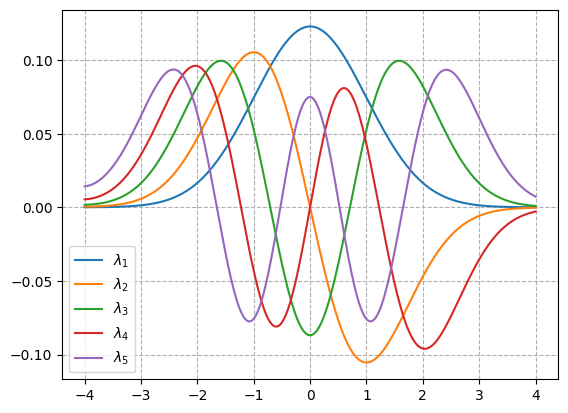

In [9]:
eigenvalues = []
eigenvectors = []


epsilon_initial = 1
epsilon_diff = 0.1
y_prime_0 = 1
y0 = np.array([np.sqrt(4**2 - epsilon_initial), y_prime_0])
x = np.arange(-4, 4, 0.1)
# Boundary Conditions to think about
for mode in range(1, 6):

    epsilon_current = epsilon_initial
    epsilon_diff = 0.1

    for blah in range(1000):
        sol = solve_ivp(
            fun=my_ode,
            t_span=(-4, 4),
            y0=y0,
            method="RK45",
            args=(epsilon_current,),
            dense_output=True
        )

        boundary_value_diff = sol.y[1,-1] - target_bc_end(4, epsilon_current, sol.y[0, -1])

        if abs(boundary_value_diff) < 1e-6:
            print(epsilon_current)
            eigenvalues.append(epsilon_current)
            break
        
        elif (-1)**(mode + 1)*boundary_value_diff < 0:
            epsilon_current -= epsilon_diff
            epsilon_diff /= 2

        else:
            epsilon_current += epsilon_diff
            
    epsilon_initial = epsilon_current + 0.1

    x_eval = np.linspace(-4, 4, 300)

    eigenvector = sol.sol(x_eval)[0, :]
    norm_of_eigenvector = np.linalg.norm(eigenvector, ord=2)
    normalized_eigenvector = eigenvector/norm_of_eigenvector

    eigenvectors.append(normalized_eigenvector)

    plt.plot(x_eval, normalized_eigenvector, label=rf"$\lambda_{mode}$")
    plt.legend()
    plt.grid()

plt.show()

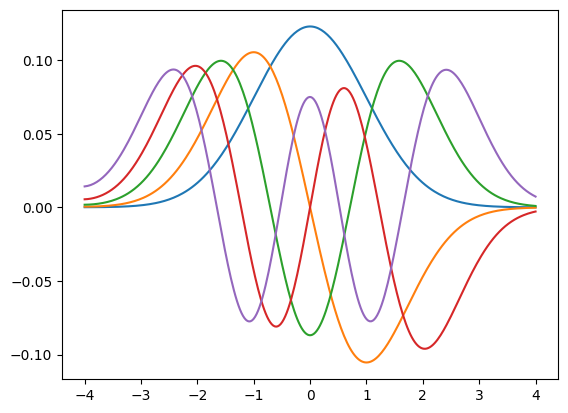

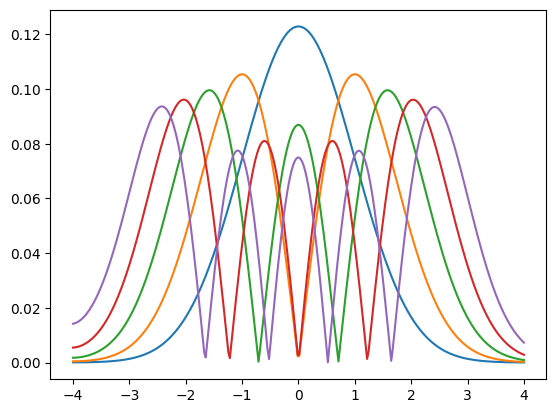

In [24]:
for i in range(5):
    plt.plot(x_eval, np.vstack(eigenvectors).T[:, i])
plt.show()

for i in range(5):
    plt.plot(x_eval, abs(np.vstack(eigenvectors).T[:, i]))
plt.show()

In [26]:
# TODO: Actually print the results you need to submit
# The abdsolute value of the first 5 eigenfunctions, this should be (2,5)
A1 = np.vstack(eigenvectors).T
# The corresponding first 5 eigenvalues, this should be (1,5)
A2 = np.array(eigenvalues)

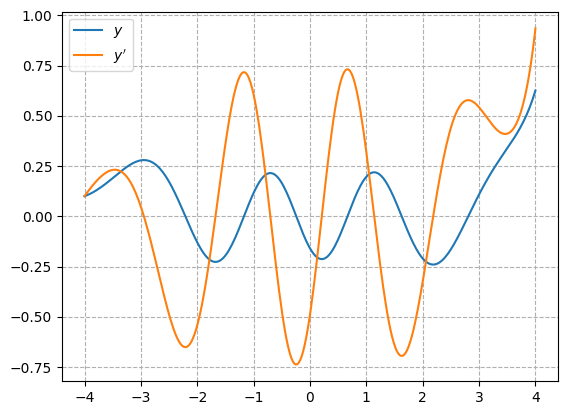

In [3]:
epsilon = 12
y_initial_guess = np.array([.1, .1])
x = np.arange(-4, 4, 0.1)

sol = solve_ivp(
    fun=my_ode,
    t_span=(-4, 4),
    y0=y_initial_guess,
    method="RK45",
    args=(epsilon,),
    dense_output=True
)

x_eval = np.linspace(-4, 4, 300)
plt.plot(x_eval, sol.sol(x_eval)[0], label=r"$y$")
plt.plot(x_eval, sol.sol(x_eval)[1], label=r"$y^{\prime}$")
plt.legend()
plt.grid()
plt.show()

In [4]:
epsilon = 4.9
epsilon_diff = 0.1
y_prime_0 = 1
y0 = np.array([np.sqrt(4**2 - epsilon), y_prime_0])
x = np.arange(-4, 4, 0.1)
# Boundary Conditions to think about

for blah in range(1000):

    sol = solve_ivp(
        fun=my_ode,
        t_span=(-4, 4),
        y0=y0,
        method="RK45",
        args=(epsilon,),
        dense_output=True
    )

    if abs(sol.y[1,-1] - target_bc_end(4, epsilon, sol.y[0, -1])) < 1e-6:
        print(epsilon)
        break
    
    elif sol.y[1,-1] < target_bc_end(4, epsilon, sol.y[0, -1]):
        epsilon += epsilon_diff
        epsilon_diff /= 2
    
    elif sol.y[1,-1] > target_bc_end(4, epsilon, sol.y[0, -1]):
        epsilon -= epsilon_diff
        epsilon_diff /= 2


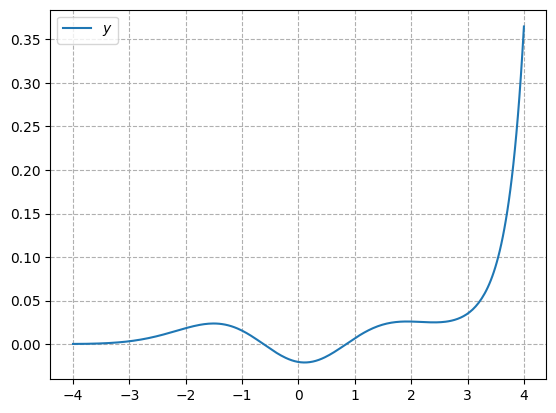

In [5]:
x_eval = np.linspace(-4, 4, 300)
plt.plot(x_eval, sol.sol(x_eval)[0, :]/np.linalg.norm(sol.sol(x_eval)[0, :], ord=2), label=r"$y$")
# plt.plot(x_eval, sol.sol(x_eval)[1, :], label=r"$y^{\prime}$")
plt.legend()
plt.grid()
plt.show()